<h1 align='center'>Distribution of LDA topics</h1>

In this notebook we have a closer look at the topics we computed with the LDA algorithm and analyze their popularity across different countries and over time
<hr>

In [15]:
from gensim import corpora, models, similarities, matutils
import itertools
import numpy as np
import pandas as pd
from unidecode import unidecode
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

In [16]:
dropbox = "/Users/mr/Dropbox/moviemeta/"

In [55]:
imdb_topic_labels ={0:'magic, myths',
                    1:'school, college',
                    2:'fantasy, christmas',
                    3:'home', 
                    4:'ships, sailing, pirates',
                    5:'love, relationships',
                    6:'war', 
                    7:'exploration, nature, space', 
                    8:'comedy',
                    9:'places, nature, scenery',
                    10:'hollywood, stars', 
                    11:'society, culture',
                    12:'historical, costumes', 
                    13:'money, robbery',
                    14:'photography, design',
                    15:'spies, terrorism', 
                    16:'mixed', 
                    17:'town',
                    18:'press, politics',
                    19:'crime, police, underworld',
                    20:'documentary, interview',
                    21:'friendship, relationships',
                    22:'cowboys and indians',
                    23:'night life, enjoyment',
                    24:'crime, mistery', 
                    25:'music',
                    26:'farming, country side',
                    27:'fantasy, fairy tale',
                    28:'love, family', 
                    29:'gangs, drugs, police'}

## LDA topic distribution for IMDB data

In [142]:
imdb_lda = models.LdaModel.load(dropbox +'lda_imdb.model')
imdb_corpus = corpora.MmCorpus(dropbox +'lda_imdb.corpus')
imdb_dict = corpora.Dictionary.load(dropbox +'lda_imdb.dict')
imdb_meta_df = pd.read_csv(dropbox + 'imdb_meta_df.csv')

imdb_topic_matrix = matutils.corpus2dense(imdb_lda[imdb_corpus], num_terms=30, num_docs=len(imdb_corpus))
imdb_topic_df = pd.DataFrame(np.ndarray.transpose(imdb_topic_matrix))
imdb_topic_df = pd.concat([imdb_topic_df, imdb_meta_df], axis=1) 


Now we have created a dataframe with the topic distribution for every movie. We have 30 topics, columns 0 - 29. The values represent how prominently a topic features in a movie.

In [78]:
imdb_topic_df.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,Unnamed: 0,title,year,origin
0,0,0,0,0,0.000000,0.101874,0,0.000000,0,0,...,0.655060,0.00000,0.000000,0.000000,0,0,0,#1 Cheerleader Camp (2010) (V),2010,USA
1,0,0,0,0,0.037337,0.000000,0,0.800628,0,0,...,0.000000,0.00000,0.000000,0.000000,0,0,1,#1 Serial Killer (2013),2013,USA
2,0,0,0,0,0.000000,0.000000,0,0.000000,0,0,...,0.229641,0.00000,0.000000,0.069434,0,0,2,#1 at the Apocalypse Box Office (2015),2015,Australia
3,0,0,0,0,0.000000,0.291724,0,0.290441,0,0,...,0.000000,0.03563,0.030289,0.000000,0,0,3,#137 (2011),2011,Australia
4,0,0,0,0,0.000000,0.000000,0,0.516713,0,0,...,0.000000,0.10710,0.000000,0.000000,0,0,4,#29 (2012),2012,Netherlands


### Filter metadata by popular movies

In [18]:
topmovies_df=pd.read_csv(dropbox + "TopMovies_final.csv")

In [28]:
def get(df, year=None, country=None):
    """get a dataframe filtered by year and/or country"""
    if year:
        df = df[df['year']==year]
        if country:
            return df[df['country']==country]
    elif country:
        return df[df['country']==country]
    return df

We are going to perform our analysis on movies since 2007, because those are years we have box office data for.

In [20]:
imdb_meta_top_df = pd.DataFrame()

for year in range(2007, 2015):
    meta = get(imdb_meta_df, year)
    top = get(topmovies_df, year)
    #remove date from imdb title
    titles = meta.title.apply(lambda x : x.split('(')[0].strip().lower())
    meta = meta[titles.isin([t.lower() for t in top.movie.tolist()])]
    imdb_meta_top_df = pd.concat([imdb_meta_top_df, meta])

### Add countries of origin 

We create a data frame of all movies since 2007 and add the countries of origin fram the IMDB data set. 

In [4]:
imdb_meta_2007_2015 = imdb_meta_df[imdb_meta_df.year > 2006]

with open(dropbox + "imdb/countries.list") as f:
    countries = f.readlines()
    
imdb_meta_2007_2015['origin'] = pd.Series(index=imdb_meta_2007_2015.index)
for i,movie in enumerate(countries):
    if movie[0] == '"':
        continue
    if i%10000 == 0:
        print i
    split = movie.split('\t')
    title = split[0]
    idx = imdb_meta_2007_2015[imdb_meta_2007_2015['title']== title].index
    #if the title is in our dataframe add the country
    if len(idx > 0):
        imdb_meta_2007_2015.loc[[idx[0]],['origin']]= split[len(split)-1].replace('\n','')
imdb_meta_2007_2015.to_csv(dropbox + 'imdb_meta_2007_2015.csv')

/Users/mr/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mr/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:420: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
1390000
1400000
1410000
1420000
1430000
1440000
1450000
1460000
1470000
1480000
1490000
1500000
1510000
1520000
1530000
1540000
1550000
1560000
1570000
1580000
1590000
1600000
1610000
1620000
1630000
1640000
1650000
1660000
1670000
1680000
1690000
1700000
1710000


In [8]:
imdb_meta_2007_2015.head()

,Unnamed: 0,title,year,origin
0,0,#1 Cheerleader Camp (2010) (V),2010,USA
1,1,#1 Serial Killer (2013),2013,USA
2,2,#1 at the Apocalypse Box Office (2015),2015,Australia
3,3,#137 (2011),2011,Australia
4,4,#29 (2012),2012,Netherlands


In [21]:
imdb_meta_2007_2015 = pd.read_csv(dropbox + 'imdb_meta_top_df.csv')
imdb_meta_2007_2015 = imdb_meta_2007_2015.set_index('Unnamed: 0')

imdb_topic_df = pd.concat([imdb_topic_df, imdb_meta_2007_2015[['origin']]], axis=1) 

In [37]:
def get_origin(df, year=None, origin=None):
    """get a dataframe filtered by year and/or origin"""
    if year:
        df = df[df['year']==year]
        if origin:
            return df[df['origin']==origin]
    elif origin:
        return df[df['origin']==origin]
    return df

In [58]:
def get_topic_scores_by_origin(df, topics, origins):
    """get the topic scores from a topic matrix topic and country of origin"""
    scores = []
    for origin in origins:
        for topic in topics:
            score = get_origin(df, origin=origin)[topic].mean()
            if math.isnan(topic_mean):
                score = 0
            scores.append((origin, imdb_topic_labels[topic], score))
    return scores

In [60]:
origins = imdb_meta_2007_2015.origin.unique()
topic_scores_origin = get_topic_scores_by_origin(imdb_topic_df, range(0, 30), origins)
topic_scores_origin_df = pd.DataFrame(topic_scores_origin, columns=['origin', 'topic', 'topic_score'])
topic_scores_origin_df.head()

,origin,topic,topic_score
0,USA,"magic, myths",0.009287
1,USA,"school, college",0.030766
2,USA,"fantasy, christmas",0.009535
3,USA,home,0.035623
4,USA,"ships, sailing, pirates",0.009207


In [61]:
topic_scores_origin_df.to_csv(dropbox + 'origin_df_new.csv')

The data frame we just created is for the tableau visualisations on our website

### Topic matrix of popular movies

In [147]:
imdb_topic_df.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,Unnamed: 0,title,year,origin,Unnamed: 0,title,year
0,0,0,0,0,0.000000,0.101874,0,0.000000,0,0,...,0.000000,0,0,0,#1 Cheerleader Camp (2010) (V),2010,USA,0,#1 Cheerleader Camp (2010) (V),2010
1,0,0,0,0,0.037337,0.000000,0,0.800628,0,0,...,0.000000,0,0,1,#1 Serial Killer (2013),2013,USA,1,#1 Serial Killer (2013),2013
2,0,0,0,0,0.000000,0.000000,0,0.000000,0,0,...,0.069434,0,0,2,#1 at the Apocalypse Box Office (2015),2015,Australia,2,#1 at the Apocalypse Box Office (2015),2015
3,0,0,0,0,0.000000,0.291724,0,0.290441,0,0,...,0.000000,0,0,3,#137 (2011),2011,Australia,3,#137 (2011),2011
4,0,0,0,0,0.000000,0.000000,0,0.516713,0,0,...,0.000000,0,0,4,#29 (2012),2012,Netherlands,4,#29 (2012),2012


In [67]:
imdb_topic_top_df = pd.DataFrame()

for year in range(2007, 2015):
    for country in ['Germany','United States', 'United Kingdom', 'South Korea', 'Mexico', 'Russia']:
        topics = get(imdb_topic_df, year)
        top = get(topmovies_df, year,country)
        #remove date from imdb title, compare lower cased titles
        titles = topics.title.apply(lambda x : x.split('(')[0].strip().lower())
        top_topics = topics[titles.isin([t.lower() for t in top.movie.tolist()])]
        top_topics['country'] = country
        imdb_topic_top_df = pd.concat([imdb_topic_top_df, top_topics])
imdb_topic_top_df.head()    

/Users/mr/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,Unnamed: 0,title,year,origin,country
971,0.000000,0.037582,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.034577,0.000000,0.000000,0,0.240583,971,1408 (2007),2007,USA,Germany
1299,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.045010,0.000000,0,0.000000,1299,2 Days in Paris (2007),2007,Germany,Germany
1795,0.000000,0.000000,0,0.039088,0.036962,0.184726,0.352293,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.055487,0,0.040894,1795,28 Weeks Later (2007),2007,Spain,Germany
2022,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.024312,0.439051,0.027903,0.000000,...,0.066744,0.000000,0.000000,0,0.000000,2022,30 Days of Night (2007),2007,New Zealand,Germany
6155,0.095538,0.018784,0,0.000000,0.000000,0.000000,0.000000,0.409056,0.000000,0.030133,...,0.021456,0.015018,0.000000,0,0.000000,6155,A Mighty Heart (2007),2007,UK,Germany


In [145]:
imdb_topic_df.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,Unnamed: 0,title,year,origin,Unnamed: 0,title,year
0,0,0,0,0,0.000000,0.101874,0,0.000000,0,0,...,0.000000,0,0,0,#1 Cheerleader Camp (2010) (V),2010,USA,0,#1 Cheerleader Camp (2010) (V),2010
1,0,0,0,0,0.037337,0.000000,0,0.800628,0,0,...,0.000000,0,0,1,#1 Serial Killer (2013),2013,USA,1,#1 Serial Killer (2013),2013
2,0,0,0,0,0.000000,0.000000,0,0.000000,0,0,...,0.069434,0,0,2,#1 at the Apocalypse Box Office (2015),2015,Australia,2,#1 at the Apocalypse Box Office (2015),2015
3,0,0,0,0,0.000000,0.291724,0,0.290441,0,0,...,0.000000,0,0,3,#137 (2011),2011,Australia,3,#137 (2011),2011
4,0,0,0,0,0.000000,0.000000,0,0.516713,0,0,...,0.000000,0,0,4,#29 (2012),2012,Netherlands,4,#29 (2012),2012


In [70]:
countries = ['Germany','United States', 'United Kingdom', 'South Korea', 'Mexico', 'Russia']
for year in range(2007, 2015):
    for country in countries:
        print country
        print year
        print get(imdb_topic_top_df, year, country).shape[0]
        print '================================'

In [132]:
def get_topic_scores_by_country(df, topics, countries, n):
    """get the topic scores from a topic matrix by country of popularity, limiting to the top n popular movies"""
    scores = []
    for country in countries:
        for topic in topics:
            score = get(df, country=country).head(50)[topic].sum()
            if math.isnan(score):
                score = 0
            scores.append((country, imdb_topic_labels[topic], score))
    return scores

The smallest available number of movies per country per year is 52, so we will limit our analysis to the top 50 movies per year per country of popularity 

In [133]:
topic_scores_country = get_topic_scores_by_country(imdb_topic_top_df, range(0, 30), countries, 50)
topic_scores_country_df = pd.DataFrame(topic_scores_country, columns=['country', 'topic', 'topic_score'])
topic_scores_country_df.head()

,country,topic,topic_score
0,Germany,"magic, myths",0.347530
1,Germany,"school, college",1.304653
2,Germany,"fantasy, christmas",0.105409
3,Germany,home,1.211086
4,Germany,"ships, sailing, pirates",0.404271


In [77]:
topic_scores_country_df.to_csv(dropbox + 'popularity_new.csv')

In [81]:
def toptopics(df, num=5):
    """get the globally most relevant topics from a topic matrix"""
    topics = range(0,30)
    topic_sums = []
    for topic in topics:
        topic_sum = df[topic].sum()
        topic_sums.append((topic, topic_sum))

    topic_sums = sorted(topic_sums, key=lambda x: x[1], reverse=True)
    return [tup[0] for tup in topic_sums][:num]
imdb_top_topics = toptopics(imdb_topic_df)

Let's have a look, what the globally most relevant topic are:

In [83]:
[imdb_topic_labels[t] for t in imdb_top_topics]

['love, relationships',
 'love, family',
 'friendship, relationships',
 'exploration, nature, space',
 'crime, mistery']

We see that the topics revolving around love and relationships are prevalent. Who would have thought?

## Topic popularity across time and countries

First we define 2 functions to get the mean topic scores by country and year and by year only:

In [84]:
def get_topic_scores_year(df, topics, years):
    """get the topic scores from a topic matrix by year and topic"""
    topic_scores = dict.fromkeys(topics) 
    for topic in topics:
        scores = []
        for year in years:
            topic_mean = get(df, year)[topic].mean()
            if not math.isnan(topic_mean):
                scores.append(topic_mean)
            else: scores.append(0)
            topic_scores[topic] = scores
    return topic_scores

In [116]:
def get_topic_scores(df, topics):
    """get the topic scores from a topic matrix by topic"""
    scores = []
    for topic in topics:
        topic_mean = df[topic].mean()
        scores.append(topic_mean)
    return topics,scores


We now collect all topic scores from IMDB by year.

In [86]:
years = range(2007,2015)
imdb_topic_scores = get_topic_scores_year(imdb_topic_df, imdb_top_topics, years)
#set topic labels instead of keys
for key in imdb_topic_scores.keys():
    imdb_topic_scores[imdb_topic_labels[key]] = imdb_topic_scores.pop(key)

We filter the popular topics for 3 countries and store in new frames.

In [127]:
pop_usa = get(imdb_topic_top_df, country='United States')
pop_ge = get(imdb_topic_top_df, country='Germany')
pop_sk = get(imdb_topic_top_df, country='South Korea')

### Topic popularity by countries

Now we can have a look at the differences between the popularity of topics between the countries.

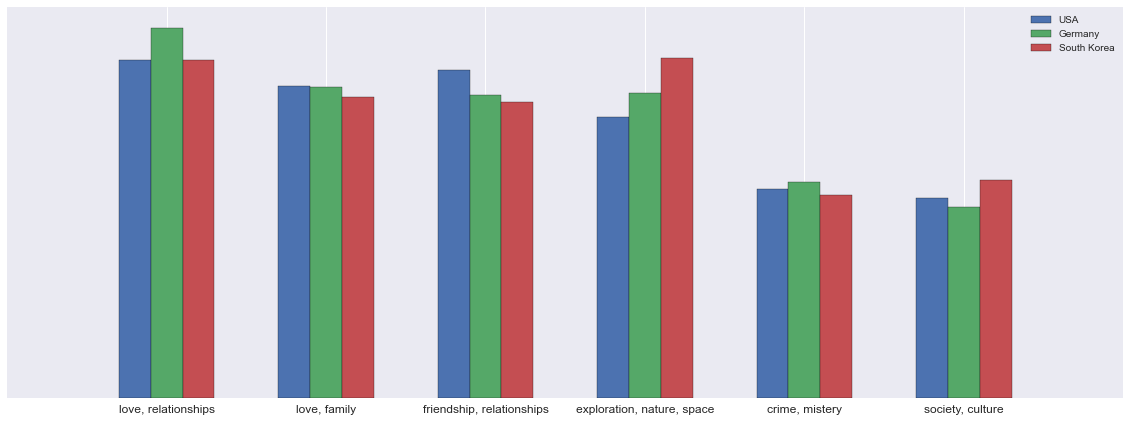

In [128]:
# some help from here: http://stackoverflow.com/questions/14270391/python-matplotlib-multiple-bars
top_topics = toptopics(imdb_topic_df, num=6)
topics, usscores  = get_topic_scores(pop_usa, top_topics)
_, gescores  = get_topic_scores(pop_ge, top_topics)
_, skscores  = get_topic_scores(pop_sk, top_topics)

plt.figure(figsize=(20,7))
palette = sns.color_palette()
x = range(len(topics))
plt.bar([e-0.2 for e in x], usscores, width=0.2,color = palette[0], align='center', label='USA' )
plt.bar(x, gescores, width=0.2, color = palette[1], align='center', label='Germany')
plt.bar([e+0.2 for e in x], skscores,width=0.2,color = palette[2], align='center' , label='South Korea')
labels = [imdb_topic_labels[key] for key in topics]
plt.xticks(x, labels,fontsize=12)
plt.yticks([])
plt.legend()
plt.show()

We see that the popularity of different topics is quite similar across the countries. But we can make out some differences especially when comparing the USA with South Korea. For example, while the 'love,family' topic is prevalent in the USA (along with 'friendship, relationship', the 'exploration, nature, space' topic is much more popular in South Korea. 

### Topic popularity over time

Now let's have a look at the development of topics over time. We have collected boxoffice data for USA and Germany since 2001 and for South Korea since 2007.

In [126]:
pop_usa[pop_usa.year==2008]

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,Unnamed: 0,title,year,origin,country


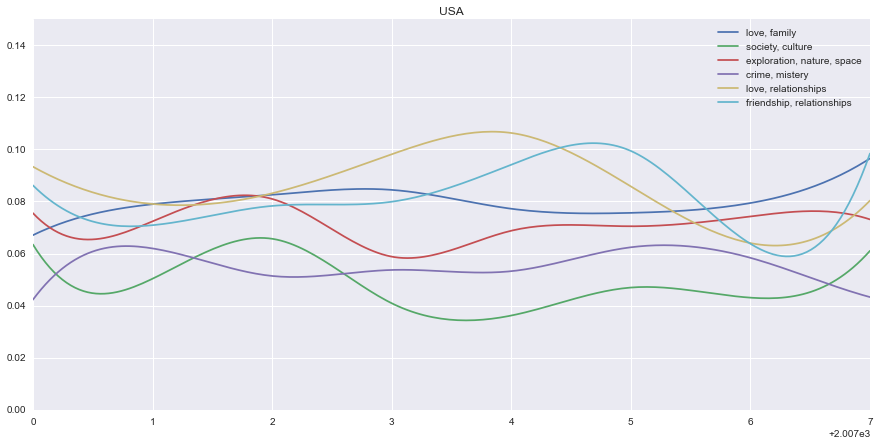

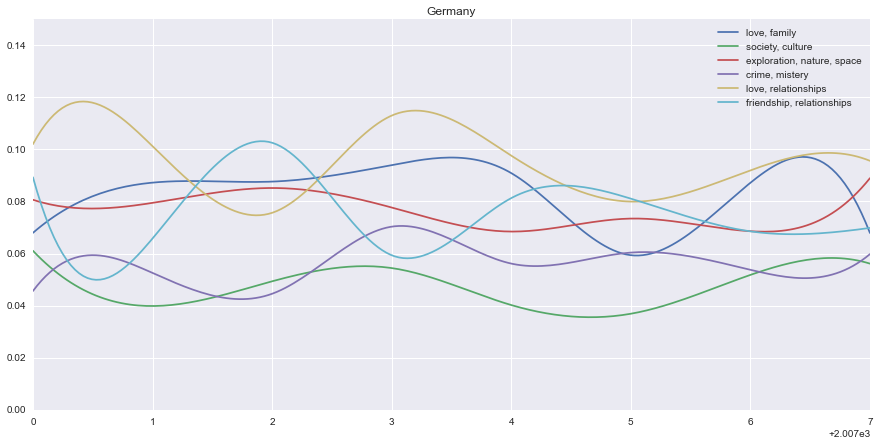

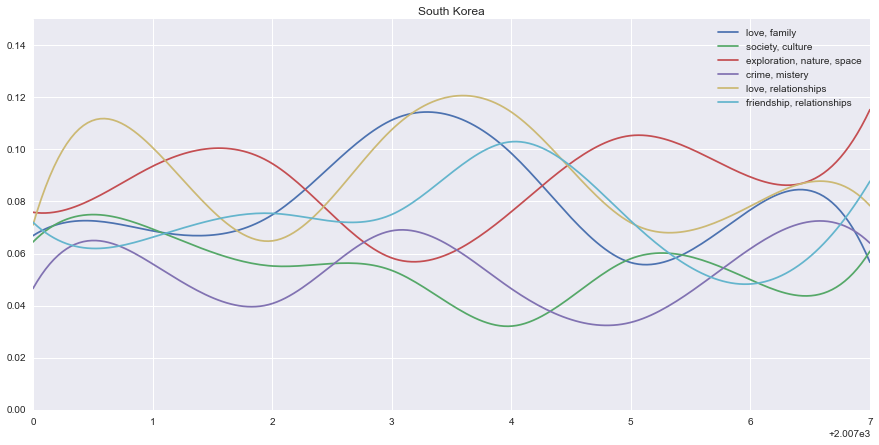

In [129]:
from scipy.interpolate  import spline
def key2label(d):
    for key in d.keys():
        d[imdb_topic_labels[key]] = d.pop(key)
        
years = range(2007,2015)
pop_usa_scores_year = get_topic_scores_year(pop_usa, top_topics, years)
key2label(pop_usa_scores_year)
pop_sk_scores_year = get_topic_scores_year(pop_sk, top_topics, years)
key2label(pop_sk_scores_year)
pop_ge_scores_year = get_topic_scores_year(pop_ge, top_topics, years)
key2label(pop_ge_scores_year)

def timeseries(score_dict, title):
    plt.figure(figsize=(15,7))
    for topic in score_dict.keys():
        x = years
        y = score_dict[topic]
        x_smooth = np.linspace(min(x), max(x), 200)
        y_smooth = spline(x, y, x_smooth)
        plt.plot(x_smooth, y_smooth, label=topic)
    plt.title(title)
    plt.ylim((0,0.15))
    plt.legend()  
    plt.show
timeseries(pop_usa_scores_year, 'USA')
timeseries(pop_ge_scores_year, 'Germany')
timeseries(pop_sk_scores_year, 'South Korea')


We can't really make out any trends in the time series. Topics tend to move up and down from year to year, but generally stay in the same zone. 

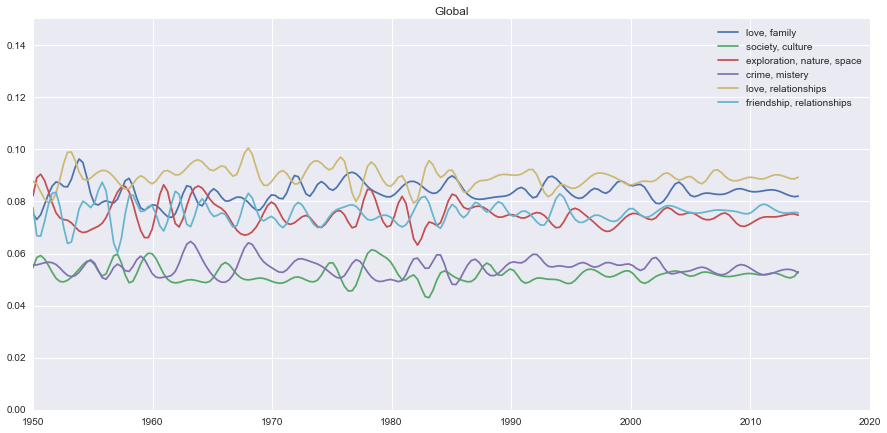

In [661]:
years = range(1950,2015)
topic_scores_year = get_topic_scores_year(imdb_topic_df, top_topics, years)
key2label(topic_scores_year)
timeseries(topic_scores_year,'Global')

Looking at the global development since 1950 we see a similar plot. There is one observation we can make though: Until about 1985 there is a lot of movement in the topics, after that the lines become much more even. But this could be due to the fact that there is much less data for the earlier years.